In [1]:
# 환경셋팅
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression# - LinearRegression Model Class
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
import seaborn as sns 

In [2]:
# 데이터 불러오기
data = pd.read_csv('./archive/example.csv')
data

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,...,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,...,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26547,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,...,24.0,50.0,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1
26548,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,...,18.0,40.0,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0
26549,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,...,29.0,45.0,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1
26550,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,...,21.0,30.0,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1


In [3]:
# 문제와 답 (열 분리)
X = data[['FG_PCT_home','FT_PCT_home','FG3_PCT_home','AST_home','REB_home','PTS_away']]
y = data['PTS_home']#

In [4]:
# 훈련셋과 테스트셋 분리 (행 분리)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

In [5]:
# 모델 객체 생성
lr_model = LinearRegression()
# w값을 제어할 수 있는 속성(하이퍼 파라미터) x
# 수학 공식에 의해서 w,b를 찾아주는 모델 >> 해당 w를 제어할(개선할) 방법 x
# Linear_model을 선택할 경우 과대적합을 제어하려면 데이터를 정리해야 함

In [6]:
# 모델 학습
lr_model.fit(X_train,y_train)

LinearRegression()

In [7]:
# 모델 예측
accuracy = lr_model.score(X_test,y_test)

In [8]:
# 교차 검증 수행
lr_result = cross_val_score(lr_model, X_train, y_train, cv=5)
print(lr_result)
print(lr_result.mean())

[0.790205   0.80239783 0.7864257  0.78533189 0.78566681]
0.7900054464925473


In [9]:
# 결과 출력
print(f"교차 검증 점수: {lr_result}")
print(f"평균 교차 검증 점수: {lr_result.mean()}")
print(f"테스트 세트 정확도: {accuracy}")

교차 검증 점수: [0.790205   0.80239783 0.7864257  0.78533189 0.78566681]
평균 교차 검증 점수: 0.7900054464925473
테스트 세트 정확도: 0.7975323677851767


#### 선형회귀 평가지표
 - 여러 머신러닝 모델을 사용할 때 성능 지표를 보고 모델을 비교하게 되기 때문에 정량적인 지표 필요(중요)
 - mse : 평균제곱오차(오차를 제곱하여 평균한 것)
 - mae : 오차를 절댓값으로 변환해 평균한 것
 - rmse : 오차를 제곱한 것의 평균에 루트를 씌운 것
 - r2: 분산 기반 예측 성능 평가, 실제 값의 분산과 예측 값의 분산을 비교 (1이면 100% 성능)

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
pre = lr_model.predict(X_test)
# 평균 제곱 오차 
mean_squared_error(y_test, pre)
# 제곱근 평균 제곱 오차
np.sqrt(mean_squared_error(y_test, pre))
# 평균 절대 오차
mean_absolute_error(y_test, pre)
# 결정계수 R-Squared
# r2_score
r2_score(y_test, pre)
# linear_model.score(테스트문제, 답)

0.7975323677851767

#### 특성확장(전처리)
 - 모델의 성능을 높여보기 위한 노력!!
 - 다항회귀 적용해보기 : 데이터를 다항식 형태로 변형(특성의 제곱 혹은 그 이상을 추가)
 - 특성곱: 데이터의 양을 늘리는 개념(데이터 포인트를 확장)
 - 방법1) 컬럼 접근하여(선택하여) 제곱 또는 세제곱 등 특성곱 진행
 - 방법2) sklearn의 PolynomialFeatures 클래스 활용하여 특성확장 진행

In [13]:
# 상관관계 
# 답데이터와 특성데이터의 상관관계
eda_data = X_train.copy()
eda_data['PTS_home'] = y_train
eda_data

,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,PTS_home
22044,0.432,0.773,0.320,19.0,49.0,104.0,101.0
387,0.494,0.750,0.314,15.0,37.0,105.0,114.0
6970,0.319,0.759,0.200,8.0,42.0,87.0,70.0
16147,0.458,0.800,0.458,23.0,41.0,106.0,111.0
22468,0.444,0.824,0.545,17.0,51.0,87.0,98.0
...,...,...,...,...,...,...,...
11863,0.587,0.763,0.571,23.0,41.0,110.0,125.0
22401,0.476,0.842,0.417,21.0,41.0,86.0,104.0
17093,0.483,0.632,0.429,25.0,36.0,114.0,107.0
8366,0.385,0.743,0.278,16.0,66.0,75.0,101.0


In [14]:
eda_data.corr()['PTS_home'].abs().sort_values(ascending=False)

PTS_home        1.000000
FG_PCT_home     0.664401
AST_home        0.607274
PTS_away        0.482860
FG3_PCT_home    0.420834
FT_PCT_home     0.190398
REB_home        0.160596
Name: PTS_home, dtype: float64

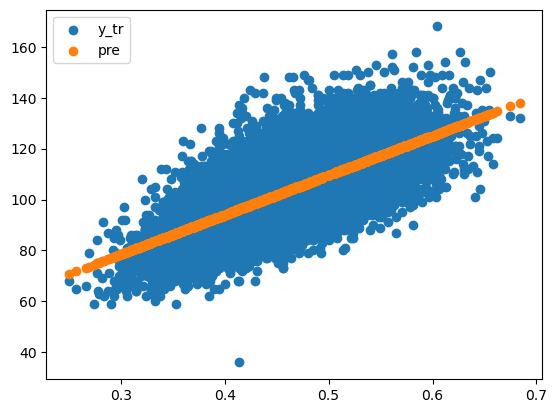

In [18]:
model = LinearRegression()
model.fit(X_train[['FG_PCT_home']], y_train)
pre = model.predict(X_train[['FG_PCT_home']])
plt.scatter(X_train['FG_PCT_home'], y_train, label = 'y_tr')
plt.scatter(X_train['FG_PCT_home'], pre, label = 'pre')
plt.legend()
plt.show()

In [24]:
# 회귀식 확인
model.coef_#회귀계수: 1.54973101
model.intercept_#편향: 68.0834959891445
#회귀선: y = 1.54973101 * x + 68.0834959891445

68.0834959891445

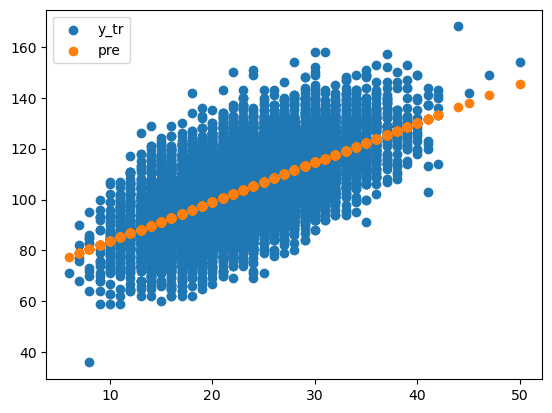

In [20]:
# 상관관계 차이가 미세해서 한번 해보았습니다.
# 필요하면 빅데이터 분석 정의서에 첨부하기
model = LinearRegression()
model.fit(X_train[['AST_home']], y_train)
pre = model.predict(X_train[['AST_home']])
plt.scatter(X_train['AST_home'], y_train, label = 'y_tr')
plt.scatter(X_train['AST_home'], pre, label = 'pre')
plt.legend()
plt.show()